# Milestone 2 - Hypothesis Simulation 

## Author - Andrew Coogan



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap and Bayesian methods
3. Compute confidence intervals for the above summary statistics by classical, bootstrap and  Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [2]:
# Load necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
from scipy.stats import shapiro
import statsmodels.formula.api as sm
import statsmodels.stats.weightstats as ws
from statistics import mean
from matplotlib import pyplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
data = pd.read_csv(fileName)
data = data.replace(to_replace="?", value=np.nan)
data = data.loc[~data.price.isnull(),]  #  Removing rows with missing price

In [4]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
data["LogPrice"] = data.price.apply(lambda l : np.log(float(l)))
data["Price"] = data.price.apply(lambda l : float(l))

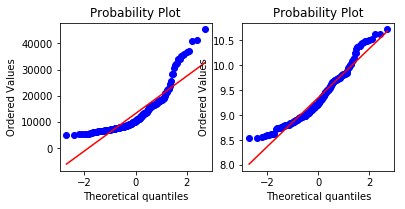

In [6]:
def qq_plot(vec1, vec2):
    plt.figure(figsize=(6, 6)).gca()
    ax1 = plt.subplot(221)
    ss.probplot(vec1, plot = ax1)
    ax1 = plt.subplot(222)
    ss.probplot(vec2, plot = ax1)
qq_plot(data.Price, data.LogPrice)  

## QQ Plot
I am going to use the log of the prices as it is a more normal distribution.  As we can see above (and as we proved in the last assignment using shapiro testing), log prices are far more normal than prices. 

In [7]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,LogPrice,Price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,9.350115,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,0.502251,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,8.540519,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,8.958669,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,9.239414,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,9.711116,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,10.723267,45400.000000


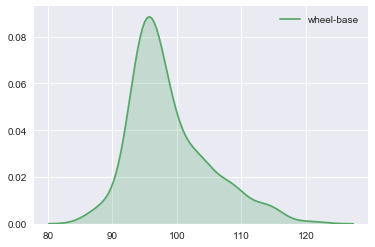

In [8]:
sns.set(color_codes=True)
sns.kdeplot(data['wheel-base'], shade=True, color="g")

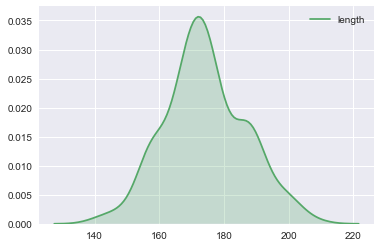

In [9]:
sns.kdeplot(data['length'], shade=True, color="g")

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


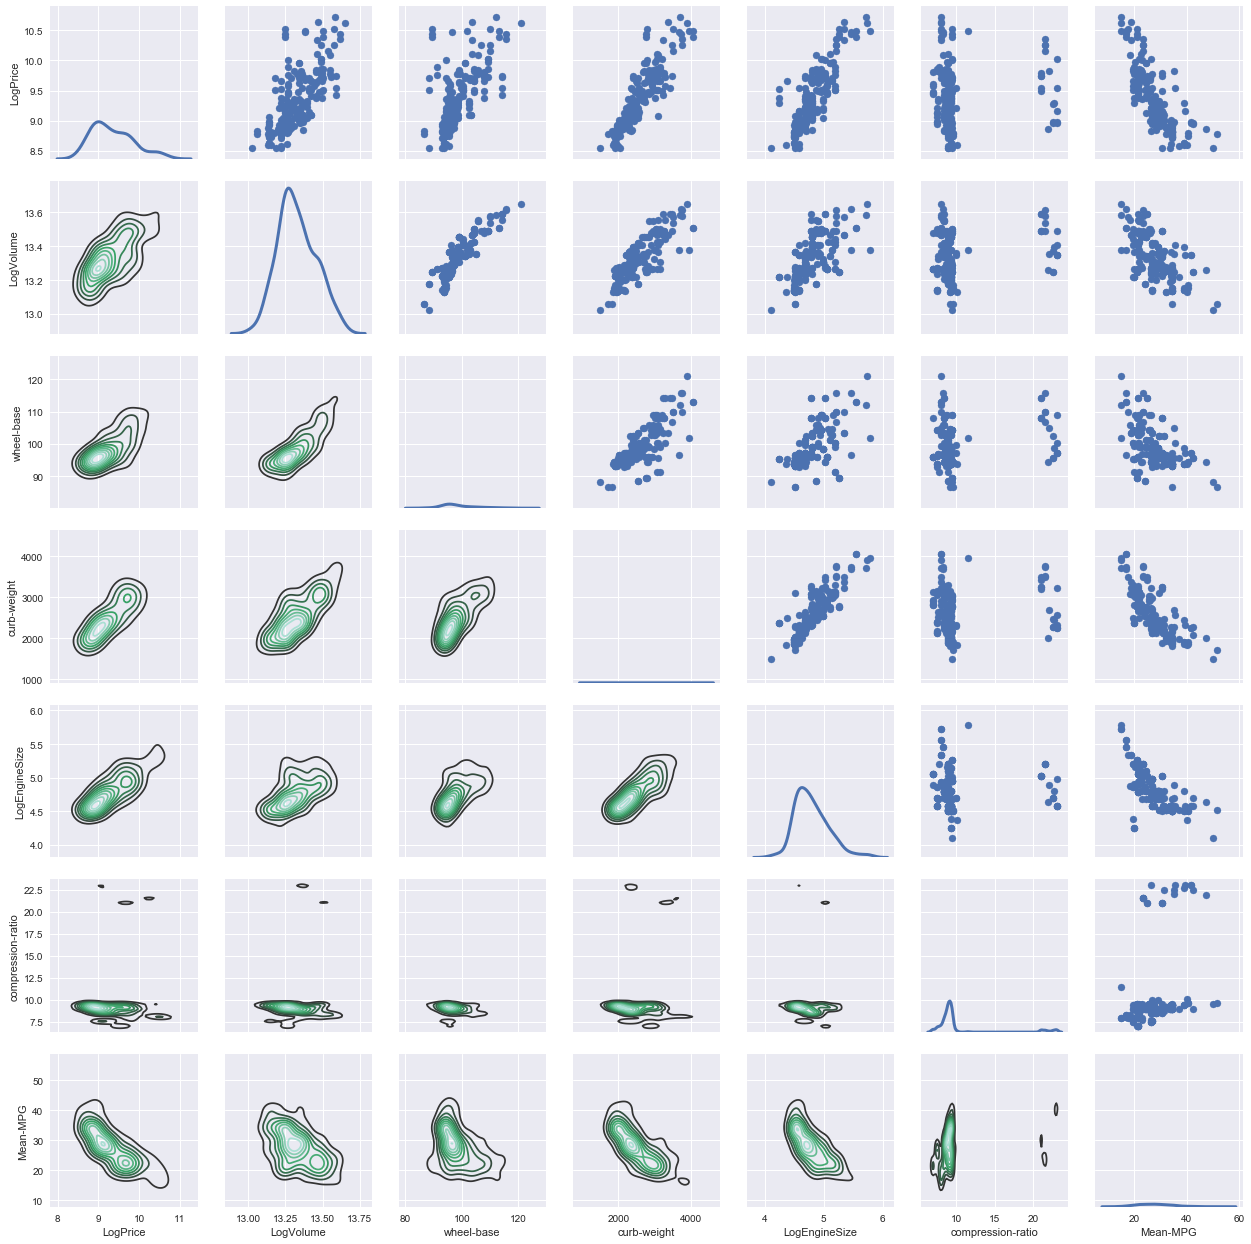

In [10]:
data["Mean-MPG"] = (data['city-mpg'] + data['highway-mpg'])/2
data['LogVolume'] = np.log(data['length'] * data['width'] * data['height'])
data['LogEngineSize'] = np.log(data['engine-size'])
coi = ['LogPrice','LogVolume', 'wheel-base','curb-weight', 'LogEngineSize', 'compression-ratio', 'Mean-MPG']
data_sub = data[coi]
g = sns.PairGrid(data_sub)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

## Pair Grid Analysis
First things first, I have created two new columns to peel out to make the anlysis more concise.  I made a "volume" variable which is the log of length * width * height (the log is to make it more shapely and not have a huge range), and I also made a average mpg, which is the average of the city and highway mpg.  Using these variables rather than the length, width, height, city-mpg, and highway-mpg allow us to look without clutter.

In the above plot we can see an anlysis of the six numeric variables (two of which are described in the above paragraph).  Lets see how normal these varibales are.

In [11]:
for c in coi:
    shapio_statisic_log, pvalue_log = shapiro(data[c])
    print('{}:'.format(c))
    print('Shapiro Statistic = ' + str(shapio_statisic_log))
    print('P-value = ' + str(pvalue_log))
    print()

LogPrice:
Shapiro Statistic = 0.9489971399307251
P-value = 1.4320623904495733e-06

LogVolume:
Shapiro Statistic = 0.9788444638252258
P-value = 0.003964056260883808

wheel-base:
Shapiro Statistic = 0.9133148193359375
P-value = 1.8063832651904477e-09

curb-weight:
Shapiro Statistic = 0.9525007009506226
P-value = 3.1428055535798194e-06

LogEngineSize:
Shapiro Statistic = 0.9426140189170837
P-value = 3.678168525311776e-07

compression-ratio:
Shapiro Statistic = 0.4965164065361023
P-value = 1.2628169778894816e-23

Mean-MPG:
Shapiro Statistic = 0.9680625796318054
P-value = 0.00015726838319096714



In [12]:
# For an example, lets look at an ACTUAL normal distribution
normal_test = np.random.normal(size = 1000)
shapio_statisic_log, pvalue_log = shapiro(normal_test)
print('Actual Normal Shapiro Statistic = ' + str(shapio_statisic_log))
print('Actual Normal P-value = ' + str(pvalue_log))

Actual Normal Shapiro Statistic = 0.9992249011993408
Actual Normal P-value = 0.9618277549743652


## Shapiro-Wilk Analysis
So for all the variables in our dataset, all of the p-values are below our alpha level (5%), so we reject the null hypothesis that the distribution is normal.  BUT, we can still look and see that some of the datasets are more normal thans others.  LogVolume is more normal than compression-ratio.  We can comare this to the trivial example of looking at an actual normal distribution I did just to prove a point, where the p-value is .786, far greater than the 0.05 we were lookin for to fail to reject the null hypothesis.

## Classical and Bootstrap Analysis
Lets look at the classical and bootstrap analysis of the above continuous variables

In [13]:
def generate_sample(dataset, n):
    return list(np.random.choice(dataset, size=n, replace=True))

def trimmed_mean(dataset, n):
    sorted_list = sorted(dataset)
    trimmed_list = sorted_list[n:(len(sorted_list) - n)]
    return(trimmed_list)

In [14]:
n_sets = 100
n_samples = len(data.index)

for c in coi:
    print('{}:'.format(c))
    print('Mean = {}'.format(str(np.mean(data[c]))))
    print('Standard Deviation = {}'.format(str(np.std(data[c]))))
    
    boot_samples = [generate_sample(data[c], n_samples) for _ in range(n_sets)]
    boot_trims = [trimmed_mean(x, 1) for x in boot_samples]

    trimmed_means = [np.mean(x) for x in boot_trims]
    trimmed_stdevs = [np.std(x) for x in boot_trims]

    trimmed_mean_avg = np.mean(trimmed_means)
    trimmed_stdev = np.mean(trimmed_stdevs)

    print('Average of the Sample Means = {}'.format(trimmed_mean_avg))
    print('Average of the Sample Standard Deviations = {}'.format(trimmed_stdev))
    print()

LogPrice:
Mean = 9.35011465835399
Standard Deviation = 0.5010005149426697
Average of the Sample Means = 9.347309379355362
Average of the Sample Standard Deviations = 0.49171253082108907

LogVolume:
Mean = 13.328815798020926
Standard Deviation = 0.12563098806703002
Average of the Sample Means = 13.326317818005528
Average of the Sample Standard Deviations = 0.12146147236912201

wheel-base:
Mean = 98.7970149253732
Standard Deviation = 6.0512562771804275
Average of the Sample Means = 98.73262814070353
Average of the Sample Standard Deviations = 5.854972370590457

curb-weight:
Mean = 2555.6666666666665
Standard Deviation = 516.0083143043122
Average of the Sample Means = 2549.222211055277
Average of the Sample Standard Deviations = 498.57642307930996

LogEngineSize:
Mean = 4.8002476734052415
Standard Deviation = 0.2811220633464001
Average of the Sample Means = 4.795228078942498
Average of the Sample Standard Deviations = 0.26896904487916135

compression-ratio:
Mean = 10.164278606965176
Stand

## Log Price vs Engine Size
Just to have a more specific focus, lets look at this relationship.  Its generally linear and it has a logical relationship, ie, luxury cars that have larger engines are going to be more expensive.  Lamborghinis that cost 10x a Toyota have about 10x the engine size as well.

## Classical Analysis

Intercept, x-Slope : Intercept    2.129409
x            1.504236
dtype: float64


Text(0.5,1,'Log(Engine Size) vs Log(Price)')

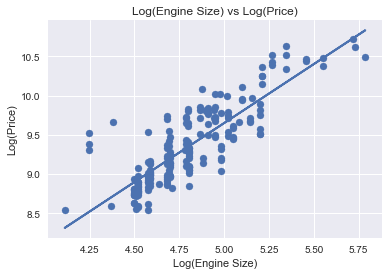

In [15]:
trimmed_data = pd.DataFrame({'x':data.LogEngineSize, 'y':data.LogPrice})

ols_model = sm.ols(formula = 'y ~ x', data = trimmed_data)

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, x-Slope : {}'.format(results.params))

y_pred = ols_model.fit().predict(trimmed_data.x)
plt.scatter(trimmed_data.x, trimmed_data.y)
plt.plot(trimmed_data.x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('Log(Engine Size)')
plt.ylabel('Log(Price)')
plt.title('Log(Engine Size) vs Log(Price)')


SSE, SST, SSR, and RMSE:
SSE: 35.94329633036517
SST: 50.45130471053685
SSR: 14.508008380171683
RMSE: 5.995272832020673
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     493.0
Date:                Mon, 30 Jul 2018   Prob (F-statistic):           9.31e-56
Time:                        17:51:48   Log-Likelihood:                -21.032
No. Observations:                 201   AIC:                             46.06
Df Residuals:                     199   BIC:                             52.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

Text(0.5,1,'Residual Histogram')

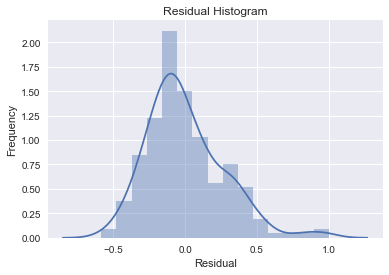

In [16]:
print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(trimmed_data.y)
sst = np.sum((trimmed_data.y - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

print(results.summary())

sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

Here we can see a histogram of the residuals.  There is a slight left skew to the data where we can see larger residuals which agrees with the engine-size vs log price plot above.  Unfortunately, the intercept is not at zero, nor contains zero, in this example, which we would expect as a car with no engine would, in theory, (and excluding emotional good valuation) be worthless.

With that said, the adjusted R-Squared of 0.687 shows that there is a good, non trivial relationship between engine size and log(prices).

## Bootstrapping Analysis

Text(0.5,1,'Log(Engine Size) vs Log(Price)')

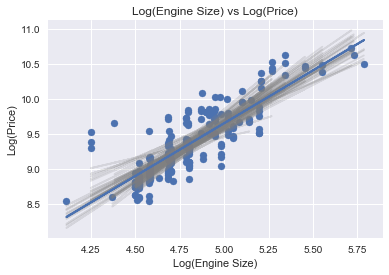

In [17]:
boot_slopes = []
boot_interc = []
n_boots, n_points = 100, 20
plt.figure()
for _ in range(n_boots):
    sample_df = trimmed_data.sample(n = n_points, replace = True)
    ols_model_temp = sm.ols(formula = 'y ~ x', data = sample_df)
    results_temp = ols_model_temp.fit()
    
    boot_interc.append(results_temp.params[0])
    boot_slopes.append(results_temp.params[1])
        
    y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])
    plt.plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2)

plt.scatter(trimmed_data.x, trimmed_data.y)
plt.plot(trimmed_data.x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('Log(Engine Size)')
plt.ylabel('Log(Price)')
plt.title('Log(Engine Size) vs Log(Price)')

As we would expect, we can see a convergence of the lines where the largest numbers of points lie.  This makes sense becaus we sample with replacement so there is the highest probablility of picking points within the highest cluster.

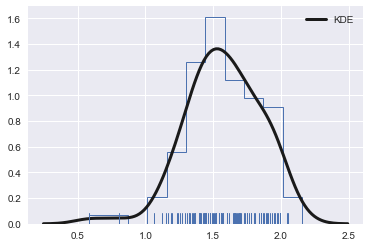

In [18]:
sns.distplot(boot_slopes, rug = True, rug_kws = {"color": "b"},
                   kde_kws = {"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws = {"histtype": "step", "linewidth": 1,
                             "alpha": 1, "color": "b"})

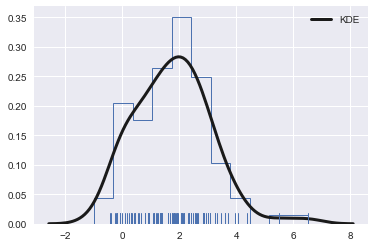

In [19]:
sns.distplot(boot_interc, rug = True, rug_kws = {"color": "b"},
                   kde_kws = {"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws = {"histtype": "step", "linewidth": 1,
                             "alpha": 1, "color": "b"})

In [20]:
boot_slopes_sorted = sorted(boot_slopes)
boot_intc_sorted = sorted(boot_interc)

print('Slope 5%: {}'.format(boot_slopes_sorted[4]))
print('Slope 95%: {}'.format(boot_slopes_sorted[94]))
print('Intercept 5%: {}'.format(boot_intc_sorted[4]))
print('Intercept 95%: {}'.format(boot_intc_sorted[94]))

Slope 5%: 1.1534031190752183
Slope 95%: 1.9921045575149021
Intercept 5%: -0.22999520530637696
Intercept 95%: 3.7212891182755707


All of the metrics we calculated above fall within these bootstrapped ranges.

## Bayes Analysis

Just so that Price and Engine Size are within a factor of 10, I am going to scale Engine Size as well.

In [21]:
data["LogESNormal"] = (data.LogEngineSize - np.mean(data.LogEngineSize)) / np.std(data.LogEngineSize)
data["LogPriceNormal"] = (data.LogPrice - np.mean(data.LogPrice)) / np.std(data.LogPrice)

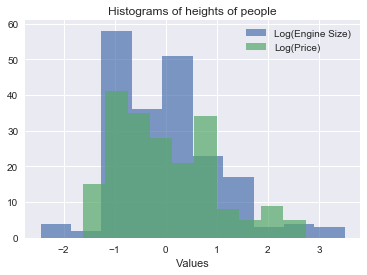

In [22]:
pyplot.title('Histograms of heights of people')
data.LogESNormal.hist(label='Log(Engine Size)', bins=10, alpha=.7)
data.LogPriceNormal.hist(label='Log(Price)', bins=10, alpha=.7)
pyplot.xlabel('Values')
pyplot.legend()

I think that this might be a little much.  The shapes are very similar and even have that nice left skew, but I think this might br forcing the data to fit.

In [23]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

Mean = 9.350, Standard deviation = 0.501


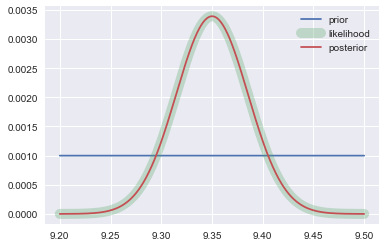

In [24]:
N = 1000
p = np.linspace(9.2, 9.5, num=N)

pp = ss.norm.pdf(p, loc=data.LogPrice.mean(), scale=5)
pp = pp / pp.sum() # normalize

like_price = comp_like(p, data.LogPrice)
post_price = posterior(pp, like_price)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_price, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_price, label='posterior')
pyplot.legend()

Mean = 4.800, Standard deviation = 0.281


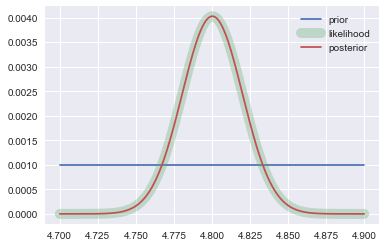

In [25]:
N = 1000
p = np.linspace(4.7, 4.9, num=N)

pp = ss.norm.pdf(p, loc=data.LogEngineSize.mean(), scale=5)
pp = pp / pp.sum() # normalize

like_price = comp_like(p, data.LogEngineSize)
post_price = posterior(pp, like_price)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_price, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_price, label='posterior')
pyplot.legend()

## Hypothesis Testing
Classical tests, Tukey’s Honest Significant Differences (HSD), Bootstrap methods, Bayesian model

For these I will look at three combinations, fuel type (gas vs diesel), drive wheels (fwd vs rwd), and body style (sedan vs hatchback).

In [26]:
def hist_plot(vec, bins):
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def hist_mean_ci(vec, t_test, bins):
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histogram of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
def t_test(a, b, alpha, alternative='two-sided'):
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)

def t_test_iter(dat, super_var, var1, var2, comp, alpha = 0.05):
    d1 = dat.loc[data.loc[:, super_var] == var1, comp]
    d2 = dat.loc[data.loc[:, super_var] == var2, comp]

    test_FT = t_test(d1, d2, alpha = alpha)
    print(test_FT)
    plot_t(d1, d2, test_FT, cols = [var1, var2]) 

DegFreedom    23.626756
Difference    -0.230212
Statistic     -1.958947
PValue         0.051516
Low95CI       -0.468326
High95CI       0.007901
dtype: float64


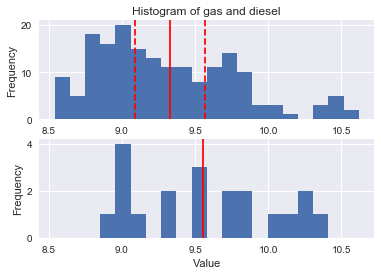

In [27]:
t_test_iter(data, super_var = 'fuel-type', var1 = 'gas', var2 = 'diesel', comp = 'LogPrice')

DegFreedom    1.235039e+02
Difference   -7.175636e-01
Statistic    -1.314614e+01
PValue        1.562940e-28
Low95CI      -8.332867e-01
High95CI     -6.018405e-01
dtype: float64


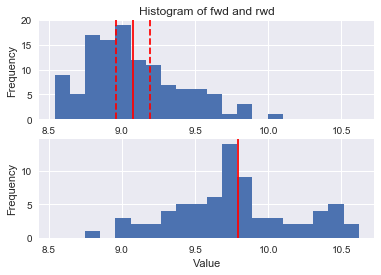

In [28]:
t_test_iter(data, super_var = 'drive-wheels', var1 = 'fwd', var2 = 'rwd', comp = 'LogPrice')

DegFreedom    159.466315
Difference      0.310888
Statistic       4.190328
PValue          0.000046
Low95CI         0.170424
High95CI        0.451353
dtype: float64


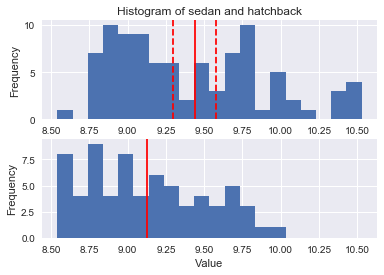

In [29]:
t_test_iter(data, super_var = 'body-style', var1 = 'sedan', var2 = 'hatchback', comp = 'LogPrice')

We fail to reject the null hypothesis for the fuel type and reject the null hypothesis for the drive wheels and body styles.  The null hypothesis meaning that the distribution of prices are similar for both fuel types, but for the othe two tests, we can see that the prices are significantly different. 

In [30]:
data['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

F statistic = 2.078896905525359
P-value = 0.15093588347930592

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 Four   Two   -0.1038  -0.2457 0.0382 False 
--------------------------------------------



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([<matplotlib.axis.XTick at 0x1a24544470>,
 <a list of 2 Text xticklabel objects>)

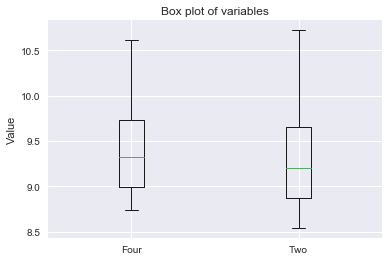

In [31]:
four = data.loc[data.loc[:, 'num-of-doors'] == 'four', 'LogPrice']
two = data.loc[data.loc[:, 'num-of-doors'] == 'two', 'LogPrice']

f_statistic, p_value = ss.f_oneway(four, two)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))
print()

doors = pd.DataFrame({'vals': four.tolist() + two.tolist(),
                   'group_num': ['Four'] * four.size + ['Two'] * two.size})
Tukey_HSD = pairwise_tukeyhsd(doors.vals, doors.group_num)
print(Tukey_HSD)
print()
plt.boxplot([four, two])
plt.ylabel('Value')
plt.title('Box plot of variables')
plt.xticks([1, 2], ['Four', 'Two'])

We fail to reject the null hypothesis for this test and can conclude with 95% condidence that two and four door models are not price significantly different from one another. 

In [32]:
data['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

F statistic = 4.715228897508633
P-value = 4.256005880463702e-05

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
  Honda      Mazda     0.2261  -0.1149  0.5672 False 
  Honda    Mitsubishi  0.1013  -0.2617  0.4643 False 
  Honda      Nissan    0.1905  -0.1464  0.5274 False 
  Honda      Peugot    0.6548   0.2757  1.034   True 
  Honda      Subaru    0.0452  -0.3253  0.4157 False 
  Honda      Toyota    0.1707  -0.1337  0.4751 False 
  Honda    Volkswagen  0.2146  -0.1559  0.5851 False 
  Honda      Volvo     0.2146  -0.1559  0.5851 False 
  Mazda    Mitsubishi -0.1248  -0.4659  0.2162 False 
  Mazda      Nissan   -0.0357  -0.3487  0.2773 False 
  Mazda      Peugot    0.4287   0.0705  0.7868  True 
  Mazda      Subaru    -0.181  -0.5299  0.168  False 
  Mazda      Toyota   -0.0554  -0.3332  0.2223 False 
  Mazda    Volkswagen -0.0116  -0.3605  0.3374 False 
  Mazda      Volv

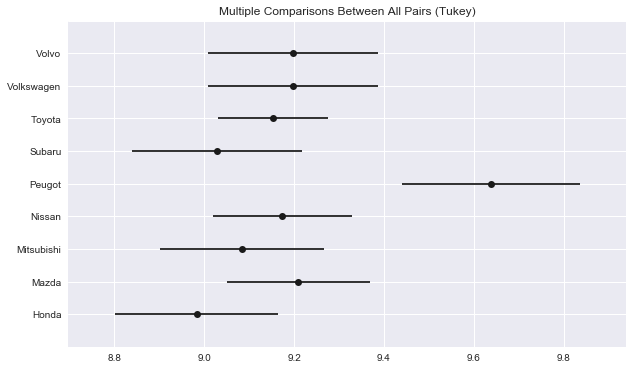

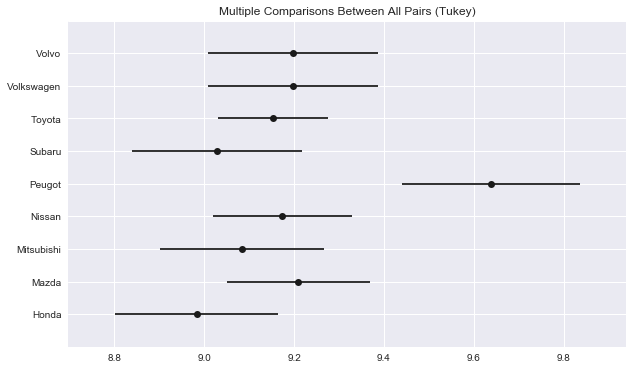

In [33]:
toyota = data.loc[data.loc[:, 'make'] == 'toyota', 'LogPrice']
nissan = data.loc[data.loc[:, 'make'] == 'nissan', 'LogPrice']
mazda = data.loc[data.loc[:, 'make'] == 'mazda', 'LogPrice']
mitsubishi = data.loc[data.loc[:, 'make'] == 'mitsubishi', 'LogPrice']
honda = data.loc[data.loc[:, 'make'] == 'honda', 'LogPrice']
subaru = data.loc[data.loc[:, 'make'] == 'subaru', 'LogPrice']
volkswagen = data.loc[data.loc[:, 'make'] == 'volkswagen', 'LogPrice']
peugot = data.loc[data.loc[:, 'make'] == 'peugot', 'LogPrice']
volvo = data.loc[data.loc[:, 'make'] == 'volkswagen', 'LogPrice']

f_statistic, p_value = ss.f_oneway(toyota, nissan, mazda, mitsubishi, 
                                   honda, subaru, volkswagen, peugot, volvo)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))
print()

make_df = pd.DataFrame({'vals': toyota.tolist() + nissan.tolist() + mazda.tolist() +
                        mitsubishi.tolist() + honda.tolist() + subaru.tolist() +
                        volkswagen.tolist() + peugot.tolist() + volvo.tolist(),
                   'group_num': ['Toyota'] * toyota.size + ['Nissan'] * nissan.size + 
                        ['Mazda'] * mazda.size + ['Mitsubishi'] * mitsubishi.size + 
                        ['Honda'] * honda.size + ['Subaru'] * subaru.size + 
                        ['Volkswagen'] * volkswagen.size + ['Peugot'] * peugot.size + 
                        ['Volvo'] * volvo.size})
Tukey_HSD = pairwise_tukeyhsd(make_df.vals, make_df.group_num)
print(Tukey_HSD)
print()
Tukey_HSD.plot_simultaneous()

As we can can see above, a lot of the vehicles are in the same general range except for Peugot, which even the cheapest model is more expensive then that most expensive of all the other models.  We are able to reject the null hypothesis for all automakers compared to Peugot and conclude that prices are significantly different.  We can also conclude that all other makers (ie all ex Peugot) are generally similarly priced with 95% confidence.

In [34]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    pyplot.hist(x, alpha=.5)
    pyplot.axvline(x.mean())
    # 95% confidence interval    
    pyplot.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    pyplot.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    pyplot.subplot(2, 1, 1)
    plot_hist(a)
    pyplot.title(a_label)
    
    pyplot.subplot(2, 1, 2)
    plot_hist(b)
    pyplot.title(b_label)
    
    pyplot.tight_layout()

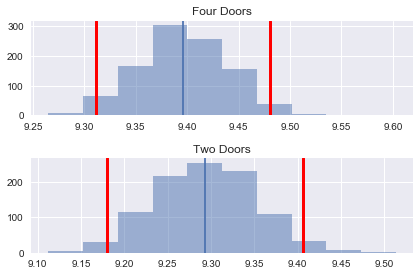

In [35]:
n_replicas = 1000

four_bootstrap_means = pd.Series([
    four.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

two_bootstrap_means = pd.Series([
        two.sample(frac=1, replace=True).mean()
        for i in range(n_replicas)])

plot_dists(four_bootstrap_means, two_bootstrap_means, 
           nbins=80, a_label='Four Doors', b_label='Two Doors')

We can see that although the distributions overlap, the means are different, but not significantly different as they lie within one another 95% confidence interval.

In [36]:
def plot_ci(p, post, num_samples, lower_q, upper_q, var):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = sp.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='blue')
    pyplot.xlabel(var)
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))

Mean = 9.350, Standard deviation = 0.501
The 0.950 credible interval is 0.025 to 0.975


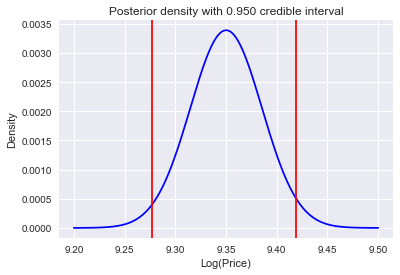

In [37]:
N = 1000
p = np.linspace(9.2, 9.5, num=N)

pp = ss.norm.pdf(p, loc=data.LogPrice.mean(), scale=5)
pp = pp / pp.sum() # normalize

like_price = comp_like(p, data.LogPrice)
post_price = posterior(pp, like_price)

plot_ci(p, post_price, N, lower_q=.025, upper_q=.975, var = 'Log(Price)')

Mean = 4.800, Standard deviation = 0.281
The 0.950 credible interval is 0.025 to 0.975


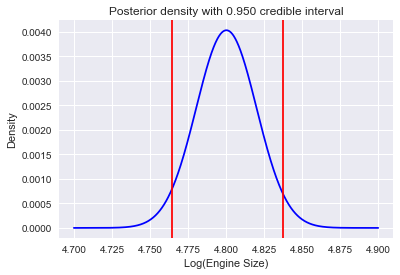

In [38]:
N = 1000
p = np.linspace(4.7, 4.9, num=N)

pp = ss.norm.pdf(p, loc=data.LogEngineSize.mean(), scale=5)
pp = pp / pp.sum() # normalize

like_price = comp_like(p, data.LogEngineSize)
post_price = posterior(pp, like_price)

plot_ci(p, post_price, N, lower_q = 0.025, upper_q = 0.975, var = 'Log(Engine Size)')

The mean hights are relatively similar--0.0034 and 0.0041 for Price and Engine Price respectively.  